# Week 9 - 11th October, 2023

1. The csv/data file will be assigned to each group during the lab-class. Using the assigned csv/data file, build a decision classifier model using
   - Ginni Index and max-depth as 6
   - Gain-Ratio
   - Information-Gain.

   For all three splitting methods, measure the  accuracy and plot the decision tree. Find the optimal `max_depth` for both Info-Gain as well as Ginni Index (depth ranging 3..10) using ROC and AUC as scoring criteria. Submit the `ipynb` file (filename as `rollno1_roll2.ipynb`) having code and output for all of the above.
3. Carefully study all three decision trees and report the difference between their performance and internal node selection. Submit the explanation/analysis using `.txt`/`.docx` file.

In [48]:
import pandas as pd

input_df = pd.read_csv('../classification-datasets/HeartEW.csv')

# Modifying the class column so that the values fall in the range of 0-1
input_df.Class = input_df.Class.apply(lambda x: x - 1)

input_df.head(5)

,Class,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,34,1,1,118,182,0,2,174,0,0.0,1,0,3
1,1,53,1,4,140,203,1,2,155,1,3.1,3,0,7
2,1,61,1,1,134,234,0,0,145,0,2.6,2,2,3
3,0,68,1,3,118,277,0,0,151,0,1.0,1,1,7
4,1,54,1,4,122,286,0,2,116,1,3.2,2,2,3


In [49]:
import numpy as np

from sklearn import tree
from sklearn.metrics import accuracy_score

X_features = input_df.drop(['Class'], axis=1).columns
filtered_df = input_df[X_features]

import statsmodels.api as sm

X = sm.add_constant(filtered_df)
Y = input_df.Class

In [50]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [51]:
dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=6)
dtree.fit(train_X, train_Y)

DecisionTreeClassifier(max_depth=6)

In [52]:
pred_Y = dtree.predict(test_X)
pred_Y

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [53]:
print(f'Accuracy is {accuracy_score(test_Y, pred_Y) * 100}')

Accuracy is 79.01234567901234


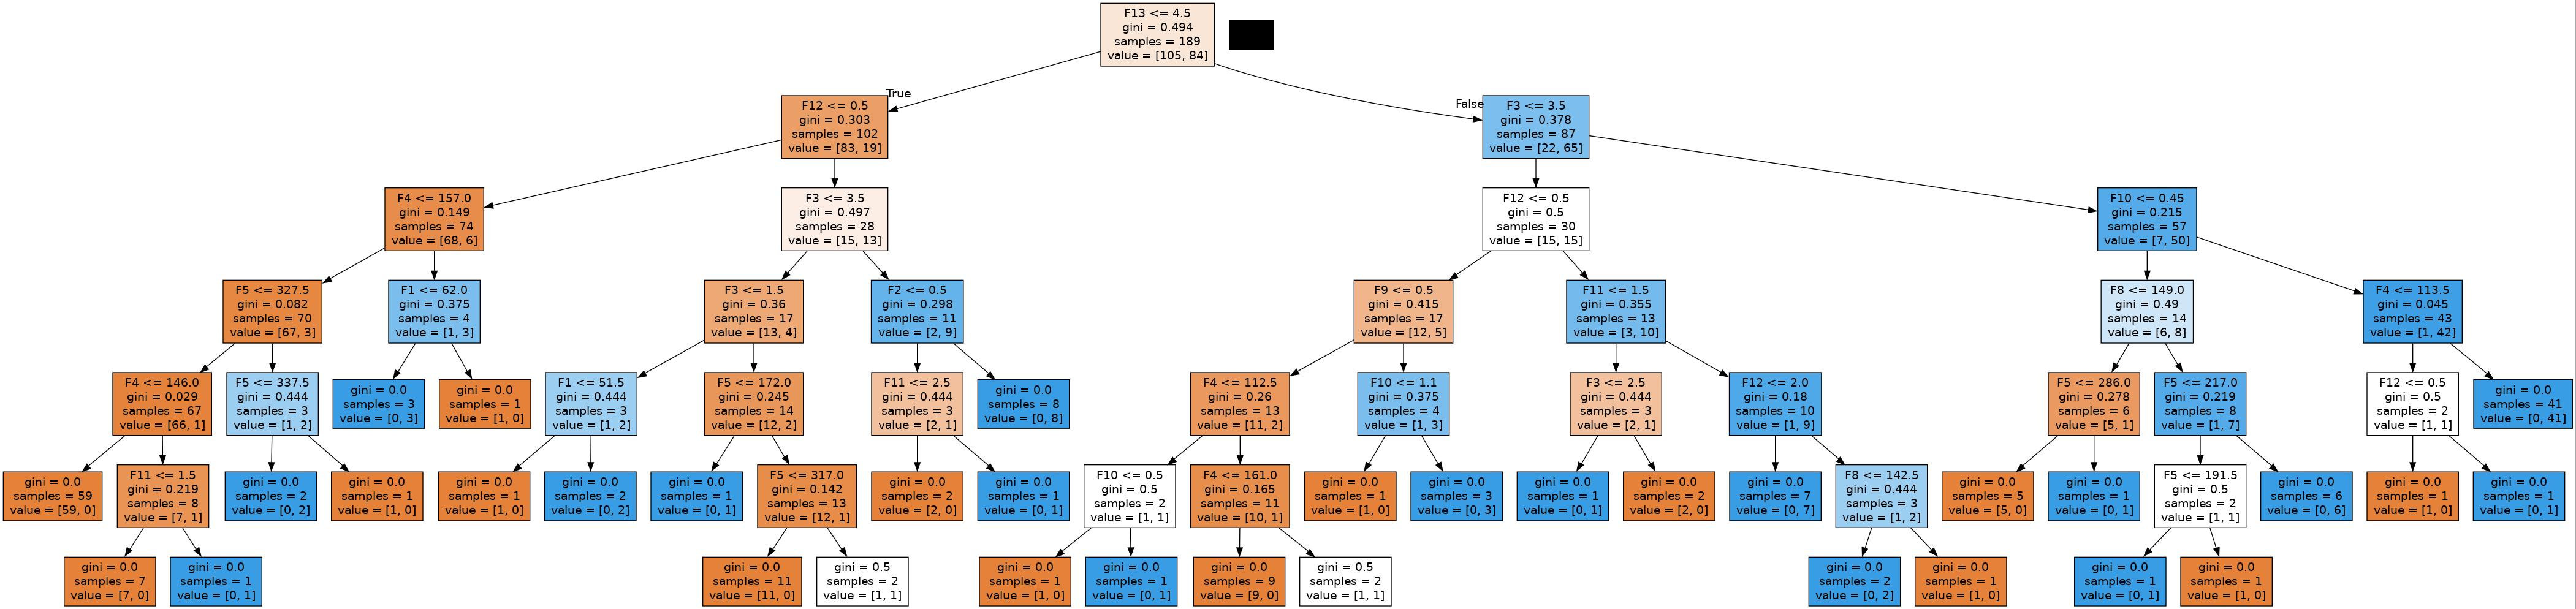

In [54]:
import pydotplus as pdot
from IPython.display import Image

tree.export_graphviz( dtree, out_file = "chd_tree.odt", feature_names = train_X.columns, filled = True)
chd_tree_graph = pdot.graphviz.graph_from_dot_file('chd_tree.odt') 
chd_tree_graph.write_jpg('chd_tree.png')
Image(filename='chd_tree.png')

In [55]:
gini_root_node = 1 - pow(105/189, 2) - pow (84/189, 2) 
print(round(gini_root_node, 4))

0.4938


In [56]:
def print_metrics(accuracy: int, precision: int, auc: int) -> None:
    print(f'Accuracy -> {round(accuracy, 5) * 100}%')
    print(f'Precision -> {round(precision, 5) * 100}%')
    print(f'Accuracy using AUC -> {round(auc, 5) * 100}%')

In [57]:
import sklearn.metrics as metrics

tree_predict = dtree.predict(test_X)
auc = metrics.roc_auc_score(test_Y, tree_predict)

accuracy = metrics.accuracy_score(test_Y, tree_predict)
precision = metrics.precision_score(test_Y, tree_predict)
print_metrics(accuracy, precision, auc)

Accuracy -> 79.012%
Precision -> 78.788%
Accuracy using AUC -> 78.333%


In [58]:
dtree_gain = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
dtree_gain.fit(train_X, train_Y)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

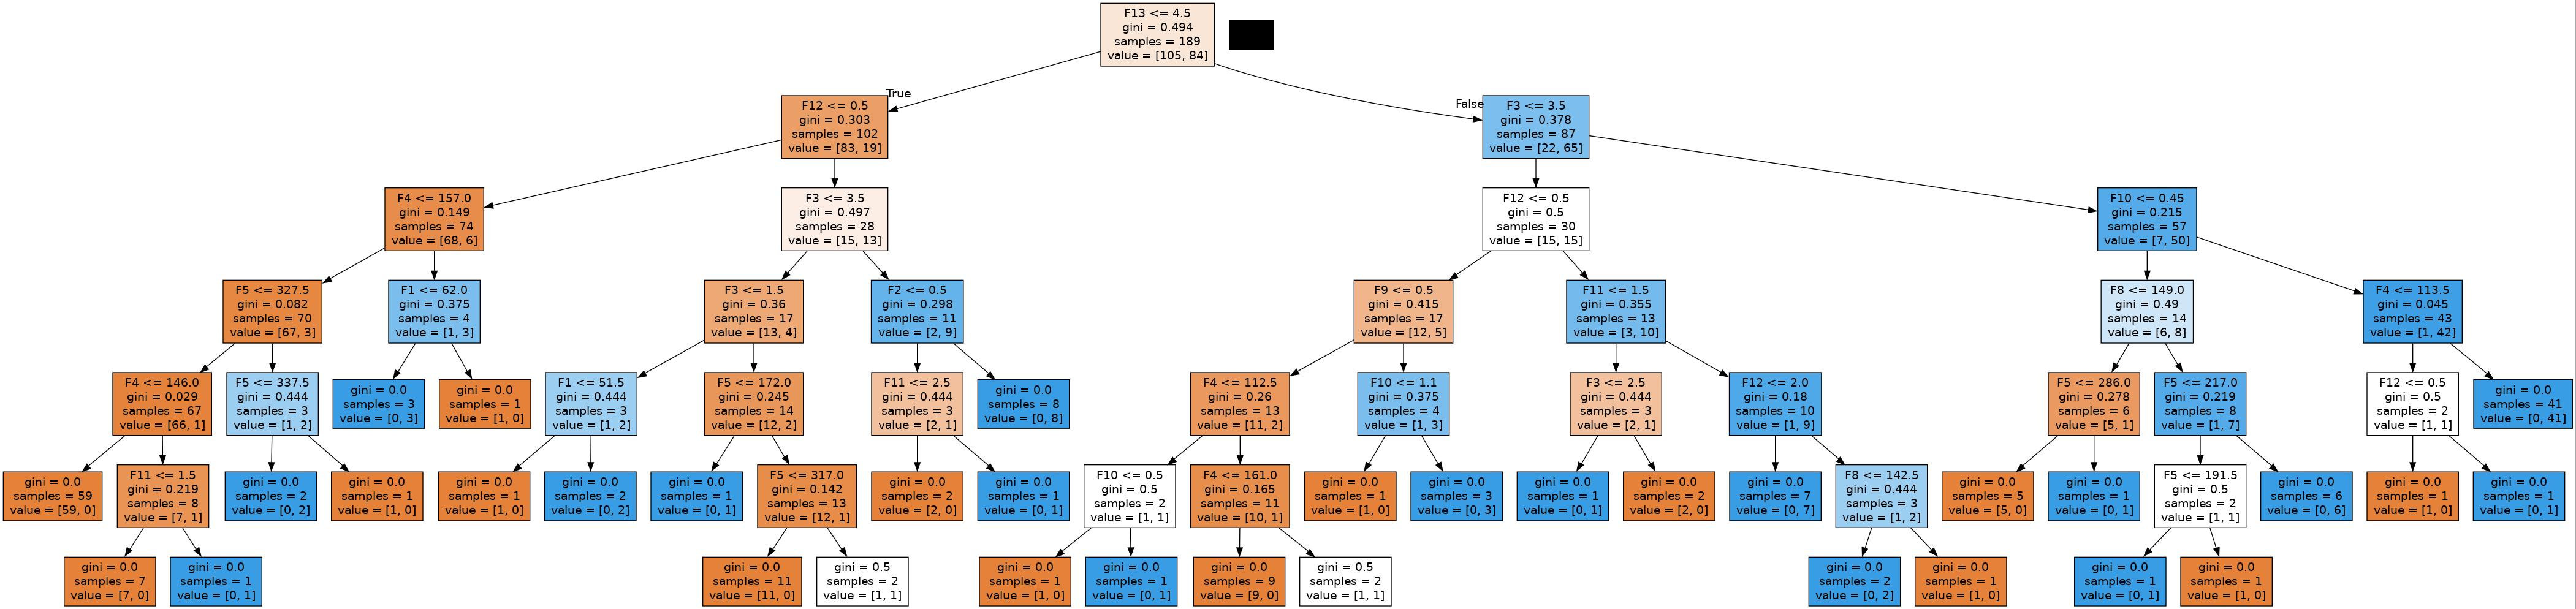

In [59]:
tree.export_graphviz(dtree_gain, out_file = "chd_tree2.odt", feature_names=train_X.columns, filled=True)
chd_tree_graph2 = pdot.graphviz.graph_from_dot_file('chd_tree2.odt')
chd_tree_graph.write_jpg('chd_tree2.png')
Image(filename='chd_tree2.png')

In [60]:
import math

entropy_root_node = - (105/189) * math.log2(105/189) - (84/189) * math.log2(84/189)
print(round(entropy_root_node, 4))

0.9911


In [61]:
tree_predict2 = dtree_gain.predict(test_X) 
auc2 = metrics.roc_auc_score(test_Y, tree_predict2)

accuracy2 = metrics.accuracy_score(test_Y, tree_predict2)
precision2 = metrics.precision_score(test_Y, tree_predict2)
print_metrics(accuracy2, precision2, auc2)

Accuracy -> 70.37%
Precision -> 63.636%
Accuracy using AUC -> 71.111%


In [62]:
dtree_info = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
dtree_info.fit(train_X, train_Y)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [63]:
y_pred2 = dtree_info.predict(test_X)

accuracy3 = metrics.accuracy_score(test_Y, y_pred2)
precision3 = metrics.precision_score(test_Y, y_pred2)
auc3 = metrics.roc_auc_score(test_Y, y_pred2)
print_metrics(accuracy3, precision3, auc3)

Accuracy -> 71.60499999999999%
Precision -> 65.854%
Accuracy using AUC -> 71.944%


In [64]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini', 'entropy'], 'max_depth': range(3,10)}]
dtree_final = tree.DecisionTreeClassifier()
clf2 = GridSearchCV(dtree_final, tuned_parameters, cv=10, scoring='roc_auc')
clf2.fit(train_X, train_Y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(3, 10)}],
             scoring='roc_auc')

In [65]:
clf2.best_score_

0.7727209595959595

In [66]:
clf2.best_params_

{'criterion': 'gini', 'max_depth': 5}